# DBSCAN hyperparameter tuning

## Hyperparameters
- eps (epsilon)
- min_clusters

## Imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
sns.set_style('ticks')

In [15]:
X = pd.read_csv('../data/processed/processed.csv')
D = X.shape[1] # As a rule of thumb, min_values should be D + 1

## Estimation of eps using distance to nearest neighbor

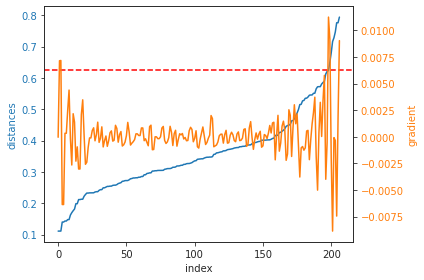

0.6238042679542153

In [16]:
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(X)
nn_distances, indices = neighbors.kneighbors(X)
nn_distances = np.sort(nn_distances, axis=0)
nn_distances = nn_distances[2:-1,1]
nn_gradient = np.gradient(np.gradient(nn_distances))
nn_eps = nn_distances[np.argmax(nn_gradient)]

fig, ax1 = plt.subplots()

ax1.set_xlabel('index')

color = 'tab:blue'
ax1.set_ylabel('distances', color=color)
ax1.plot(nn_distances, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.axhline(y=nn_eps, color='r', linestyle='--')

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('gradient', color=color)
ax2.plot(nn_gradient, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

nn_eps


## Estimation of eps using kth nearest neighbor

Sources: 
- [stats.stackexchange.com](https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan)
- [Rahmah et al., 2016](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)

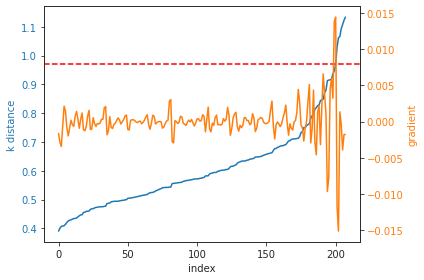

0.9705453926372986

In [17]:
k = D + 1

k_distances = squareform(pdist(X, 'euclid'))
k_distances.sort()
k_distances = np.sort(k_distances[:,k])

k_distances = k_distances[:-2]
k_gradient = np.gradient(np.gradient(k_distances))
k_eps = k_distances[np.argmax(k_gradient)]

fig, ax1 = plt.subplots()

ax1.set_xlabel('index')

color = 'tab:blue'
ax1.set_ylabel('k distance', color=color)
ax1.plot(k_distances, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.axhline(y=k_eps, color='r', linestyle='--')

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('gradient', color=color)
ax2.plot(k_gradient, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

k_eps


In [26]:
eps = k_eps
min_samples = D + 1

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'DBSCAN(eps={eps:.3f}, min_samples={min_samples}):')
print(f'n_clusters: {n_clusters_}, n_noise: {n_noise_}, sc: {silhouette_score(X, labels):.2f}')


DBSCAN(eps=0.624, min_samples=21):
n_clusters: 1, n_noise: 17, sc: 0.24
